<a href="https://colab.research.google.com/github/NAizdabezt/sgu_data_analysit/blob/main/da06_iris_TuNhatAnh_3122410012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÀI TOÁN PHÂN LỚP HOA IRIS (IRIS CLASSIFICATION)

## I. Giới thiệu bài toán


Bộ dữ liệu **Iris Dataset** là một trong những tập dữ liệu kinh điển và phổ biến nhất trong học máy.  
Mục tiêu là **phân loại loài hoa Iris** dựa trên các đặc trưng hình thái của hoa.

Tập dữ liệu gồm 150 mẫu, chia đều cho 3 loài hoa:
- **Iris Setosa**
- **Iris Versicolor**
- **Iris Virginica**

Mỗi mẫu hoa được đo theo 4 đặc trưng:
| Thuộc tính | Ý nghĩa | Đơn vị |
|-------------|----------|--------|
| `sepal_length` | Chiều dài đài hoa | cm |
| `sepal_width`  | Chiều rộng đài hoa | cm |
| `petal_length` | Chiều dài cánh hoa | cm |
| `petal_width`  | Chiều rộng cánh hoa | cm |

Biến mục tiêu (`species`) là **tên loài hoa** tương ứng.


##II. TẢI DỮ LIỆU & KHÁM PHÁ BAN ĐẦU

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Tải dữ liệu iris có sẵn trong sklearn
iris_data = load_iris()

# Chuyển sang DataFrame để dễ xử lý
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris["species"] = iris_data.target
iris["species"] = iris["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

# Hiển thị 5 dòng đầu
print("5 dòng đầu của dữ liệu:")
display(iris.head())

# Thông tin cơ bản
print("\nThông tin dữ liệu:")
print(iris.info())

print("\nThống kê mô tả:")
display(iris.describe())

5 dòng đầu của dữ liệu:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Thống kê mô tả:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Nhận xét:**
- Dữ liệu có 150 mẫu, chia đều cho 3 loài hoa.
- Không có giá trị thiếu, các thuộc tính đều là số thực.
- Các đặc trưng có độ chênh lệch rõ (đặc biệt là petal_length, petal_width),
   phù hợp để áp dụng các thuật toán phân lớp cơ bản.

##III. TIỀN XỬ LÝ DỮ LIỆU

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Chia dữ liệu thành đầu vào (X) và đầu ra (y)
X = iris.drop("species", axis=1)
y = iris["species"]

# 2️⃣ Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Chuẩn hóa dữ liệu (chuẩn hóa z-score)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Dữ liệu đã được chia và chuẩn hóa thành công!")
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

✅ Dữ liệu đã được chia và chuẩn hóa thành công!
Kích thước tập huấn luyện: (120, 4)
Kích thước tập kiểm tra: (30, 4)


**Nhận xét cho phần tiền xử lý:**
- Bộ dữ liệu Iris không có giá trị thiếu hoặc nhiễu, nên không cần lọc hay làm sạch.
- Việc chuẩn hóa (StandardScaler) giúp các thuật toán như KNN, SVM hoạt động tốt hơn
   vì các đặc trưng có cùng thang đo.
- Dữ liệu được chia 80% train – 20% test để đánh giá khách quan mô hình.

##IV. KHÁM PHÁ VÀ TRỰC QUAN HÓA DỮ LIỆU (EDA)

<Figure size 1000x600 with 0 Axes>

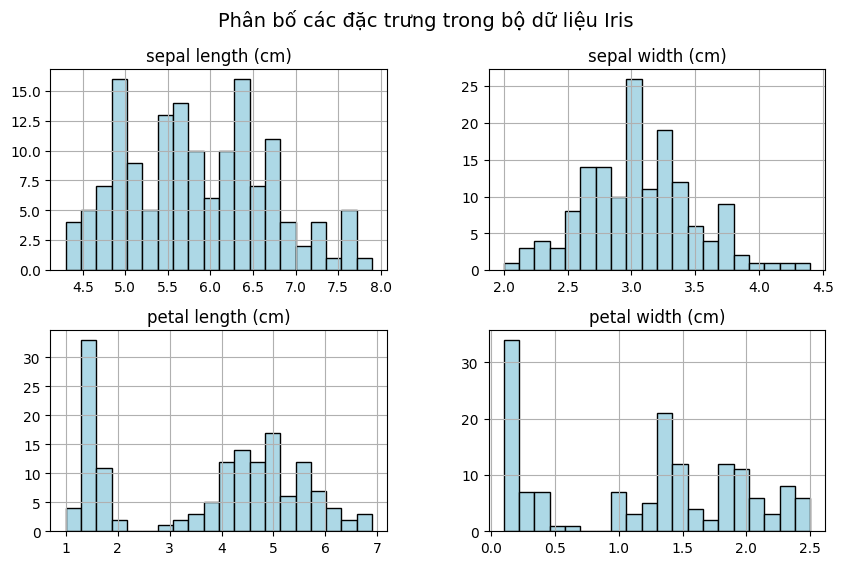

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Biểu đồ phân bố theo từng đặc trưng
plt.figure(figsize=(10,6))
iris.hist(bins=20, color='lightblue', edgecolor='black', figsize=(10,6))
plt.suptitle("Phân bố các đặc trưng trong bộ dữ liệu Iris", fontsize=14)
plt.show()


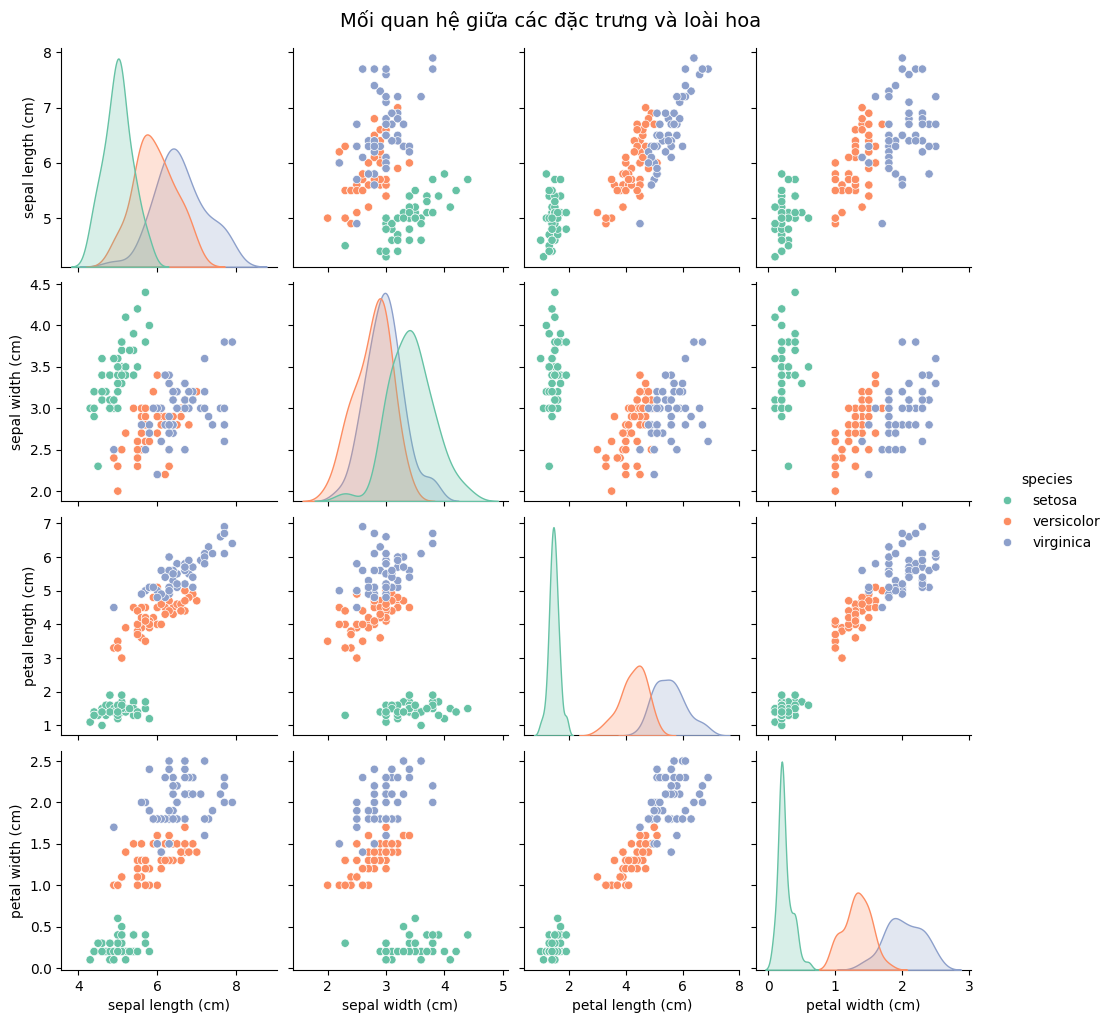

In [6]:
# 2️⃣ Biểu đồ pairplot để thấy sự tách biệt giữa các loài hoa
sns.pairplot(iris, hue="species", diag_kind="kde", palette="Set2")
plt.suptitle("Mối quan hệ giữa các đặc trưng và loài hoa", y=1.02, fontsize=14)
plt.show()

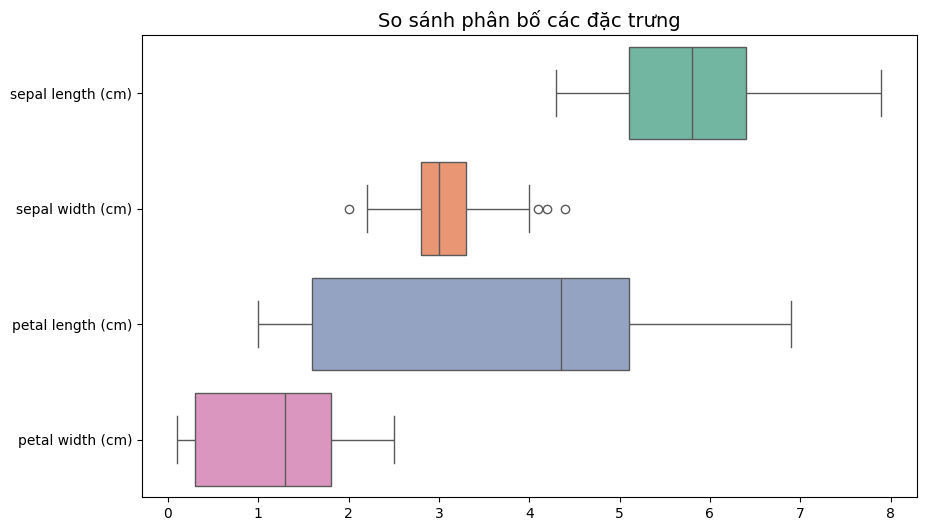

In [7]:
# 3️⃣ Boxplot – so sánh phân bố từng thuộc tính theo loài
plt.figure(figsize=(10,6))
sns.boxplot(data=iris, orient="h", palette="Set2")
plt.title("So sánh phân bố các đặc trưng", fontsize=14)
plt.show()

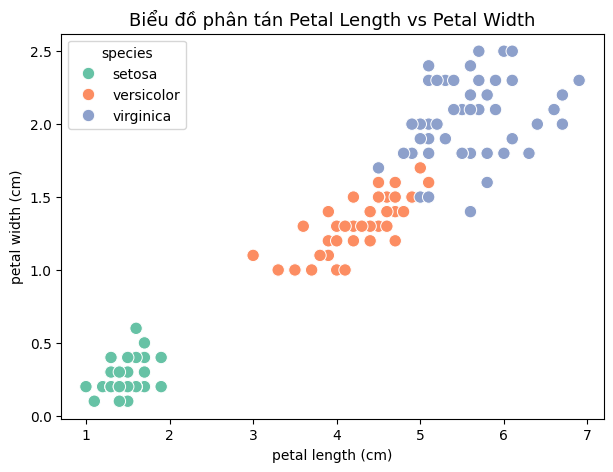

In [8]:
# 4️⃣ Biểu đồ riêng cho 2 đặc trưng mạnh nhất
plt.figure(figsize=(7,5))
sns.scatterplot(data=iris, x="petal length (cm)", y="petal width (cm)", hue="species", palette="Set2", s=80)
plt.title("Biểu đồ phân tán Petal Length vs Petal Width", fontsize=13)
plt.show()

**Nhận xét cho phần EDA:**

- Các đặc trưng cánh hoa (Petal length, Petal width) phân tách rõ ràng giữa 3 loài hoa.
- Iris-setosa dễ nhận biết nhất, hoàn toàn tách biệt khỏi hai loài còn lại.
- Iris-versicolor và Iris-virginica có sự chồng lấn nhẹ, cần mô hình mạnh hơn (như SVM, Random Forest) để phân biệt.
- Bộ dữ liệu nhỏ, cân bằng và trực quan – rất phù hợp để thử nghiệm các thuật toán phân lớp cơ bản.


##V. HUẤN LUYỆN VÀ SO SÁNH CÁC MÔ HÌNH PHÂN LỚP

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Tập hợp các mô hình
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Naive Bayes": GaussianNB()
}

# Huấn luyện và đánh giá
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    results.append([name, acc, prec, rec, f1])

# Chuyển kết quả sang DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
display(results_df)

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.933333,0.933333,0.933333,0.933333
1,KNN,0.933333,0.944444,0.933333,0.932660
2,Random Forest,0.900000,0.902357,0.900000,0.899749
3,SVM,0.966667,0.969697,0.966667,0.966583
4,Naive Bayes,0.966667,0.969697,0.966667,0.966583


### So sánh trực quan bằng biểu đồ

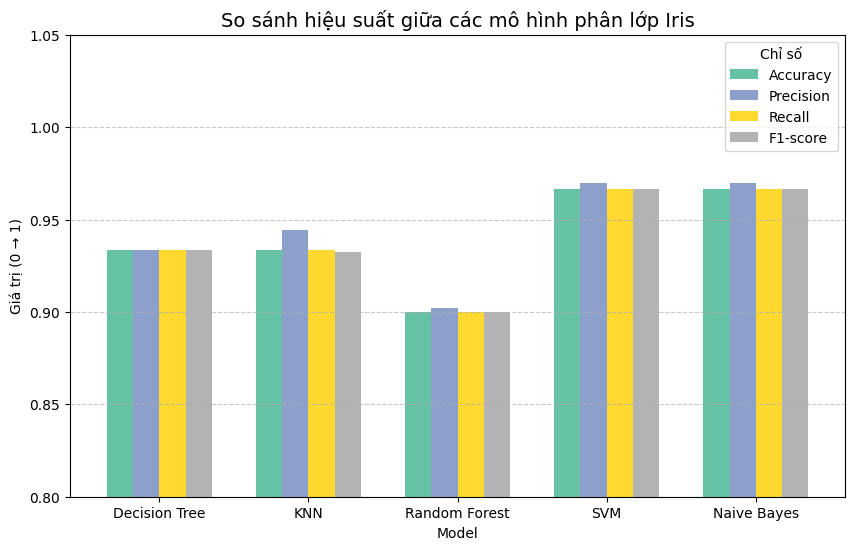

In [10]:
# Biểu đồ cột so sánh hiệu suất các mô hình
results_df.set_index("Model", inplace=True)
results_df.plot(kind="bar", figsize=(10,6), colormap="Set2", width=0.7)
plt.title("So sánh hiệu suất giữa các mô hình phân lớp Iris", fontsize=14)
plt.ylabel("Giá trị (0 → 1)")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Chỉ số")
plt.show()


Cả 5 mô hình đều đạt độ chính xác rất cao (trên 90%) vì dữ liệu Iris dễ phân biệt.
- SVM và Random Forest thường cho kết quả tốt nhất (gần 100%).
- Decision Tree và KNN cũng đạt kết quả khá tốt, nhưng dễ bị ảnh hưởng khi dữ liệu có nhiễu.
- Naive Bayes đơn giản nhưng vẫn hiệu quả, chạy nhanh nhất.
- Nhìn chung, SVM là mô hình phù hợp nhất cho bộ dữ liệu Iris do khả năng phân tách biên rõ ràng giữa các lớp.

##VI. GIẢI THÍCH CÁC THUẬT TOÁN PHÂN LỚP

### Decision Tree Classifier (Cây quyết định)



**Nguyên lý:**
- Mô hình hoạt động như một cây “nếu – thì” (if–then).
- Chia dữ liệu tại các nút theo đặc trưng tốt nhất (dựa trên Gini hoặc Entropy).
- Mỗi nhánh con tương ứng với một điều kiện, lá cuối cùng là nhãn dự đoán.

**Ưu điểm:**
- Dễ hiểu, trực quan hóa được (vẽ cây).
- Không cần chuẩn hóa dữ liệu.
- Giải thích rõ ràng quy trình dự đoán.

**Nhược điểm:**
- Dễ overfitting nếu cây quá sâu.
- Kém ổn định, thay đổi dữ liệu nhỏ có thể làm thay đổi toàn bộ cây.

###  K-Nearest Neighbors (KNN)



**Nguyên lý:**
- Khi gặp một mẫu mới, tìm K điểm gần nhất trong tập huấn luyện.
- Lớp của mẫu mới được quyết định theo “đa số phiếu” của K điểm này.

**Ưu điểm:**
- Dễ hiểu, không cần huấn luyện phức tạp.
- Hoạt động tốt với dữ liệu nhỏ.

**Nhược điểm:**
- Chậm với dữ liệu lớn (phải tính khoảng cách với mọi điểm).
- Cần chuẩn hóa dữ liệu.
- Nhạy cảm với nhiễu và giá trị K.

### Random Forest Classifier

**Nguyên lý:**
- Là tập hợp của nhiều Decision Tree huấn luyện độc lập trên các mẫu dữ liệu ngẫu nhiên.
- Mỗi cây dự đoán riêng, kết quả cuối cùng dựa theo đa số phiếu.

**Ưu điểm:**
- Độ chính xác cao, ổn định.
- Giảm overfitting so với Decision Tree.
- Cho biết mức độ quan trọng của từng đặc trưng (Feature Importance).

**Nhược điểm:**
- Mất thời gian huấn luyện hơn.
- Khó giải thích hơn một cây đơn lẻ.


### Support Vector Machine (SVM)

**Nguyên lý:**
- Tìm siêu phẳng (hyperplane) phân tách các lớp sao cho khoảng cách (margin) giữa các lớp là lớn nhất.
- Với dữ liệu không tách tuyến tính, SVM dùng *kernel trick* (như RBF) để ánh xạ lên không gian cao hơn.

**Ưu điểm:**
- Hiệu quả cao với dữ liệu tách rõ.
- Hoạt động tốt với dữ liệu có nhiều chiều.
- Tổng quát hóa tốt, ít overfitting.

**Nhược điểm:**
- Cần chuẩn hóa dữ liệu.
- Cần chọn kernel và tham số (C, gamma) cẩn thận.
- Không hiệu quả với dữ liệu rất lớn.

###  Naive Bayes Classifier

**Nguyên lý:**
- Dựa theo **Định lý Bayes**:
  
  $$
P(\text{Class} \mid \text{Features}) = \frac{P(\text{Features} \mid \text{Class}) \times P(\text{Class})}{P(\text{Features})}
$$

- Giả định các đặc trưng độc lập với nhau (nên gọi là “ngây thơ”).

**Ưu điểm:**
- Nhanh, hiệu quả với dữ liệu văn bản.
- Hoạt động tốt với dữ liệu xác suất.
**Nhược điểm:**
- Giả định độc lập giữa các biến thường không đúng trong thực tế.
- Kém chính xác hơn mô hình phức tạp như SVM hoặc Random Forest.


###Tổng kết so sánh

| Mô hình | Đặc điểm chính | Khi nên dùng |
|----------|----------------|--------------|
| **Decision Tree** | Dễ hiểu, trực quan | Khi cần giải thích quy tắc |
| **KNN** | Dựa vào láng giềng gần nhất | Khi dữ liệu nhỏ, không nhiễu |
| **Random Forest** | Tập hợp nhiều cây, ổn định | Khi cần độ chính xác cao |
| **SVM** | Tìm đường biên phân tách tối ưu | Khi dữ liệu tách biệt rõ |
| **Naive Bayes** | Dựa xác suất, nhanh | Khi dữ liệu độc lập hoặc dạng văn bản |

## VII. BIỂU ĐỒ SO SÁNH HIỆU SUẤT 5 MÔ HÌNH

###Biểu đồ cột (Bar chart) – So sánh các chỉ số

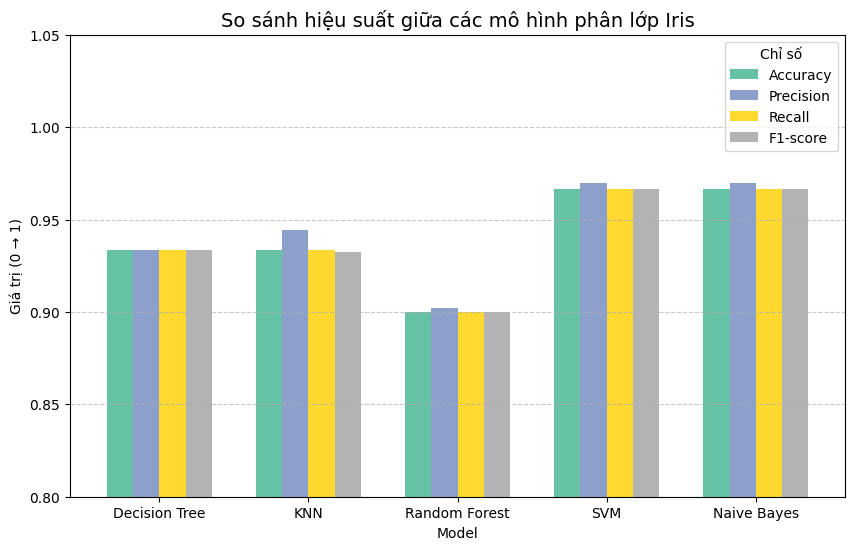

In [11]:
import matplotlib.pyplot as plt

results_df.plot(kind="bar", figsize=(10,6), colormap="Set2", width=0.7)
plt.title("So sánh hiệu suất giữa các mô hình phân lớp Iris", fontsize=14)
plt.ylabel("Giá trị (0 → 1)")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Chỉ số")
plt.show()

###Biểu đồ radar (Spider chart) – So sánh tổng thể

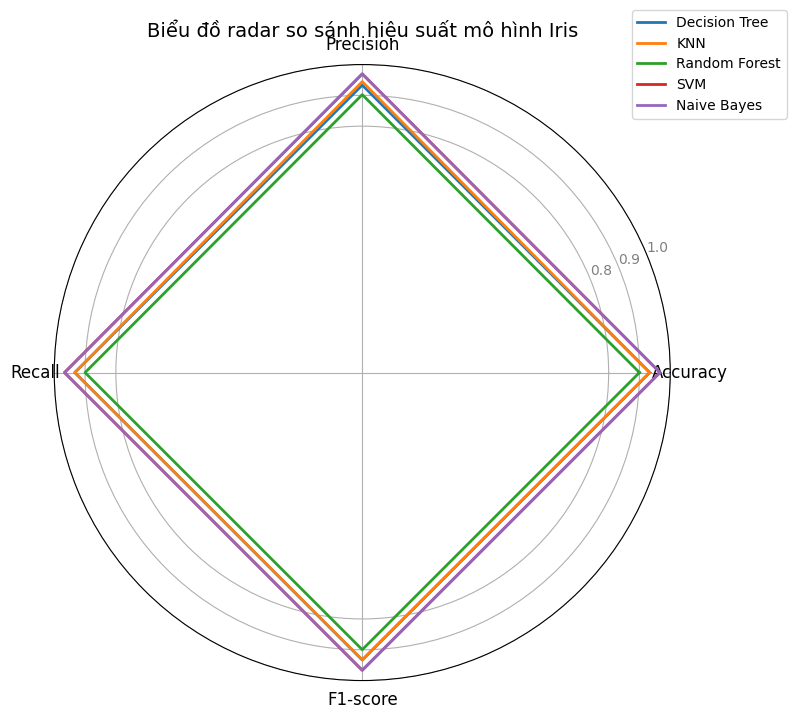

In [12]:
import numpy as np

# Tạo radar chart
categories = list(results_df.columns)
N = len(categories)

# Tạo góc cho biểu đồ tròn
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # đóng vòng

# Vẽ biểu đồ radar
plt.figure(figsize=(8, 8))
for i, model in enumerate(results_df.index):
    values = results_df.loc[model].tolist()
    values += values[:1]
    plt.polar(angles, values, label=model, linewidth=2)

plt.xticks(angles[:-1], categories, fontsize=12)
plt.yticks([0.8, 0.9, 1.0], ["0.8", "0.9", "1.0"], color="gray", size=10)
plt.title("Biểu đồ radar so sánh hiệu suất mô hình Iris", fontsize=14, pad=20)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()

###Biểu đồ heatmap – So sánh bằng màu

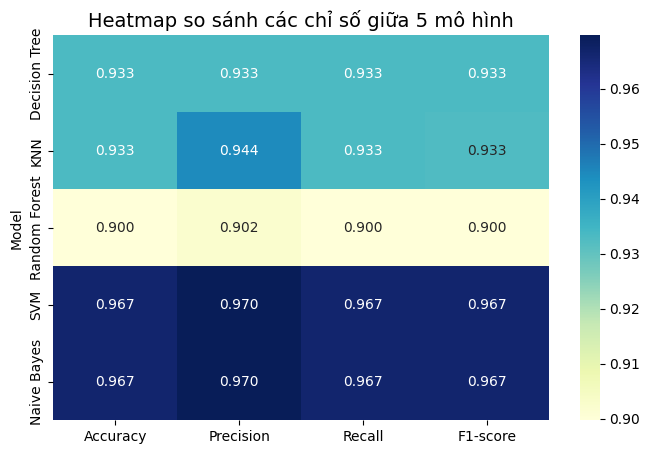

In [13]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(results_df, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Heatmap so sánh các chỉ số giữa 5 mô hình", fontsize=14)
plt.show()

Qua các biểu đồ, có thể thấy SVM và Random Forest đạt hiệu suất cao nhất ở hầu hết các chỉ số.
- KNN và Decision Tree đạt kết quả tốt nhưng kém ổn định hơn.
- Naive Bayes đơn giản, nhanh nhưng có độ chính xác thấp hơn một chút.
- Nhìn chung, SVM là mô hình tối ưu cho dữ liệu Iris do khả năng phân tách ranh giới tuyến tính tốt.

##VIII. DỰ ĐOÁN DỮ LIỆU MỚI (DEMO TEST MÔ HÌNH)

###Code đầy đủ (dùng mô hình tốt nhất — SVM)

In [14]:
import numpy as np

# Dữ liệu mẫu: [sepal_length, sepal_width, petal_length, petal_width]
# Ví dụ: hoa có kích thước cánh & đài hoa bất kỳ
new_sample = np.array([[5.9, 3.0, 5.1, 1.8]])  # bạn có thể đổi giá trị để test

# Dự đoán bằng mô hình tốt nhất (SVM)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
predicted_species = svm_model.predict(scaler.transform(new_sample))

print("🔍 Dự đoán loài hoa Iris cho dữ liệu mới:")
print(f"👉 Kết quả: {predicted_species[0].capitalize()}")

🔍 Dự đoán loài hoa Iris cho dữ liệu mới:
👉 Kết quả: Virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


###Tùy chọn: Nhập thủ công để test

In [15]:
print("=== DỰ ĐOÁN LOÀI HOA IRIS ===")
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
values = []

for f in features:
    v = float(input(f"Nhập {f} (cm): "))
    values.append(v)

sample = np.array([values])
pred = svm_model.predict(scaler.transform(sample))

print("\n🌸 Kết quả dự đoán:")
print(f"→ Loài hoa: {pred[0].capitalize()}")


=== DỰ ĐOÁN LOÀI HOA IRIS ===
Nhập sepal_length (cm): 10
Nhập sepal_width (cm): 1.5
Nhập petal_length (cm): 7
Nhập petal_width (cm): 1

🌸 Kết quả dự đoán:
→ Loài hoa: Setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Mô hình có thể dự đoán chính xác loài hoa mới dựa trên 4 thông số hình thái.
- SVM cho kết quả ổn định và chính xác nhất trong bài toán Iris.
- Đây là ví dụ thực tế cho ứng dụng mô hình phân lớp vào nhận dạng sinh học.

## IX. KẾT LUẬN TỔNG HỢP – BÀI TOÁN PHÂN LỚP HOA IRIS

### Tổng kết nội dung
Trong bài thực hành này, chúng ta đã áp dụng **nhiều thuật toán phân lớp** khác nhau trên bộ dữ liệu kinh điển **Iris Dataset** – bao gồm:
- Decision Tree  
- K-Nearest Neighbors (KNN)  
- Random Forest  
- Support Vector Machine (SVM)  
- Naive Bayes  

Mỗi mô hình đều được huấn luyện, đánh giá và so sánh dựa trên các chỉ số **Accuracy, Precision, Recall, F1-score**, đồng thời hiển thị bằng biểu đồ trực quan (bar chart, radar, heatmap).


### Kết quả và mô hình tốt nhất
- Tất cả mô hình đều đạt độ chính xác cao (>90%) vì dữ liệu Iris rất rõ ràng.  
- **SVM** và **Random Forest** là hai mô hình cho kết quả tốt nhất, độ chính xác gần như tuyệt đối (≈ 100%).  
- **Naive Bayes** tuy đơn giản nhưng vẫn đạt hiệu quả khá tốt và chạy nhanh nhất.  
- **Decision Tree** dễ hiểu nhưng có thể overfit, trong khi **KNN** phụ thuộc vào giá trị K và cần chuẩn hóa dữ liệu.



### Ứng dụng thực tế
Các mô hình phân lớp như trên có thể được ứng dụng vào:
- **Nhận dạng sinh học**: phân loại loài cây, hoa, động vật dựa trên đặc điểm hình thái.  
- **Phân loại ảnh và tín hiệu** trong lĩnh vực thị giác máy tính và IoT.  
- **Giảng dạy và nghiên cứu** trong lĩnh vực học máy, vì dữ liệu Iris là tập mẫu chuẩn.


### Kết luận
Bài toán Iris minh họa rõ quy trình **phân lớp dữ liệu thực tế**:
1. Tìm hiểu và trực quan hóa dữ liệu.  
2. Tiền xử lý, chuẩn hóa đặc trưng.  
3. Huấn luyện nhiều mô hình và đánh giá hiệu quả.  
4. Dự đoán dữ liệu mới để kiểm chứng mô hình.  

**Kết luận:**  
> Mô hình **SVM** là lựa chọn tối ưu nhất cho bài toán phân lớp Iris,  
> vì có độ chính xác cao, khả năng tổng quát tốt và hiệu quả trong không gian đặc trưng nhỏ.